In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import random

In [2]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [3]:
csv_paths = [
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_aSiMicro03036.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_aSiTandem72-46.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_aSiTriple28324.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_CdTe75638.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Cocoa_CIGS8-001.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_aSiMicro03036.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_aSiTandem72-46.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_aSiTriple28324.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_CdTe75638.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Eugene_CIGS8-001.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_aSiMicro03038.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_aSiTandem90-31.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_aSiTriple28325.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_CdTe75669.csv",
    r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned\Golden_CIGS1-001.csv",
]

# 📥 Cargar múltiples CSVs y concatenarlos
dfs = [pd.read_csv(path, parse_dates=["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"]) for path in csv_paths]
df = pd.concat(dfs, ignore_index=True)

# 🔍 Separar features y target
df = df.drop(columns='Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss')
X = df.drop(columns=['Pmp (W)']).values.astype(np.float32)
y = df['Pmp (W)'].values.astype(np.float32)

# ⚙️ Escalar
scaler = StandardScaler()
X = scaler.fit_transform(X).astype(np.float32)

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📦 Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train).unsqueeze(1)  # Para que sea shape (N, 1)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test).unsqueeze(1)


In [4]:
# 🔵 Modelo simple
class SimpleDNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleDNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# 📐 Crear modelo
input_dim = X_train.shape[1]
model = SimpleDNN(input_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleDNN(
  (model): Sequential(
    (0): Linear(in_features=9, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=32, bias=True)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)

C:\Users\Ibon\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/150], Loss: 181.7648
Epoch [2/150], Loss: 142.7853
Epoch [3/150], Loss: 140.6736
Epoch [4/150], Loss: 139.5238
Epoch [5/150], Loss: 138.6628
Epoch [6/150], Loss: 137.6836
Epoch [7/150], Loss: 136.8947
Epoch [8/150], Loss: 136.2755
Epoch [9/150], Loss: 136.0018
Epoch [10/150], Loss: 135.2550
Epoch [11/150], Loss: 135.2581
Epoch [12/150], Loss: 134.6333
Epoch [13/150], Loss: 134.2061
Epoch [14/150], Loss: 134.0580
Epoch [15/150], Loss: 133.8636
Epoch [16/150], Loss: 133.4451
Epoch [17/150], Loss: 133.1196
Epoch [18/150], Loss: 133.1148
Epoch [19/150], Loss: 132.6728
Epoch [20/150], Loss: 132.6839
Epoch [21/150], Loss: 132.5659
Epoch [22/150], Loss: 131.7959
Epoch [23/150], Loss: 132.0510
Epoch [24/150], Loss: 131.7651
Epoch [25/150], Loss: 131.5476
Epoch [26/150], Loss: 131.3522
Epoch [27/150], Loss: 131.2709
Epoch [28/150], Loss: 131.0594
Epoch [29/150], Loss: 131.0290
Epoch [30/150], Loss: 130.8174
Epoch [31/150], Loss: 130.6166
Epoch [32/150], Loss: 130.5862
Epoch [33/150], L

C:\Users\Ibon\AppData\Local\Temp\ipykernel_17992\1967779207.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_15csv.pth"))



📊 Test MSE: 135.7674
📏 Test MAE: 6.8540
📈 Test R2: 0.7964


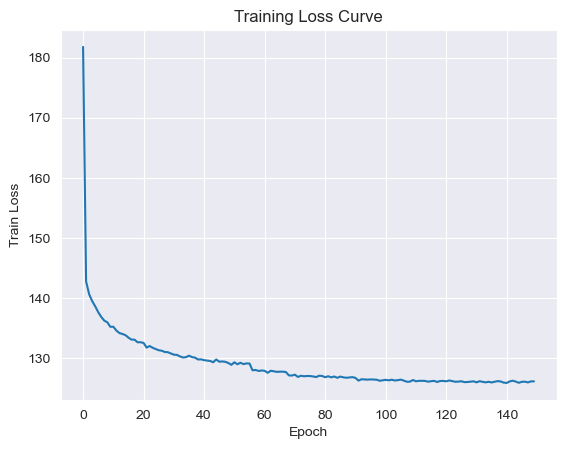

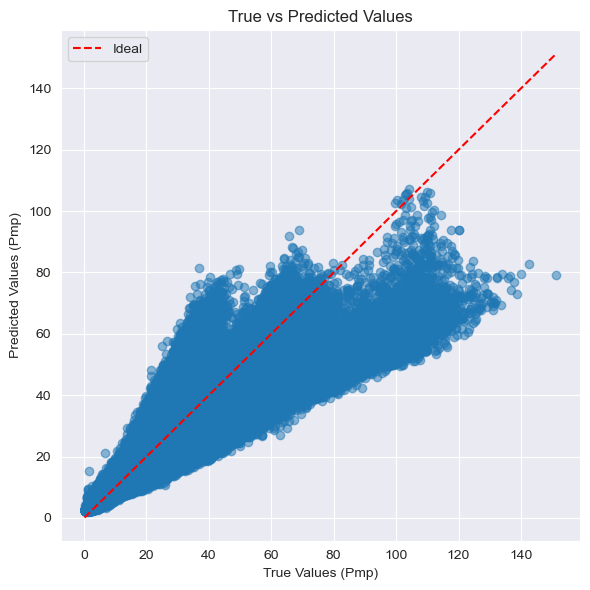

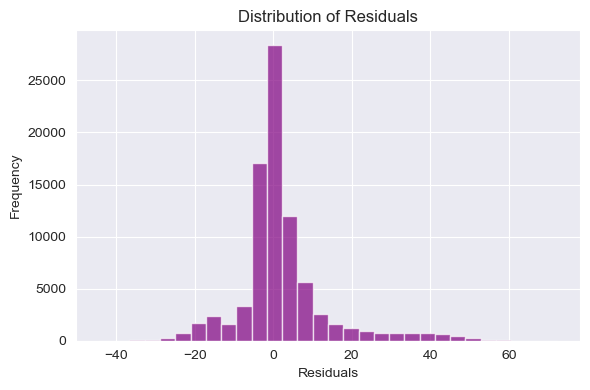

In [5]:
batch_size = 256
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)
criterion = nn.MSELoss()

epochs = 150
best_loss = np.inf
patience = 10
counter = 0
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    
    avg_loss = running_loss / len(train_loader.dataset)
    train_losses.append(avg_loss)
    
    scheduler.step(avg_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    # Early stopping
    if avg_loss < best_loss:
        best_loss = avg_loss
        counter = 0
        torch.save(model.state_dict(), "best_model_15csv.pth")
    else:
        counter += 1
        if counter >= patience:
            print(f"⏹️ Early stopping at epoch {epoch+1}")
            break

# Cargar mejor modelo
model.load_state_dict(torch.load("best_model_15csv.pth"))

# Evaluación
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor.to(device)).cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()
    
    mse = mean_squared_error(y_test_np, y_pred)
    mae = mean_absolute_error(y_test_np, y_pred)
    r2 = r2_score(y_test_np, y_pred)
    
    print(f"\n📊 Test MSE: {mse:.4f}")
    print(f"📏 Test MAE: {mae:.4f}")
    print(f"📈 Test R2: {r2:.4f}")
    
    residuals = y_test_np - y_pred

# 📈 Gráfica de la pérdida
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

# 📈 Scatter plot: Predicciones vs Reales
plt.figure(figsize=(6,6))
plt.scatter(y_test_np, y_pred, alpha=0.5)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', label='Ideal')
plt.xlabel("True Values (Pmp)")
plt.ylabel("Predicted Values (Pmp)")
plt.title("True vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Histograma de residuos
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, alpha=0.7, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()